# Assignment Lecture 19

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
df.shape

(167, 9)

- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


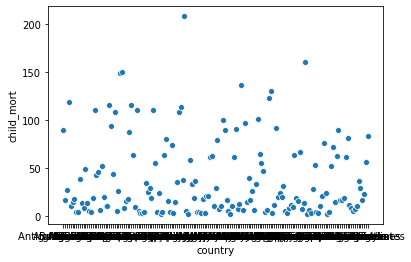

In [15]:
sns.scatterplot(df["country"], df["child_mort"])

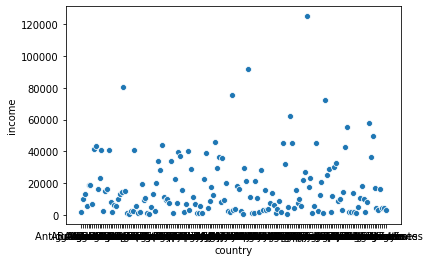

In [16]:
sns.scatterplot(df["country"], df["income"])

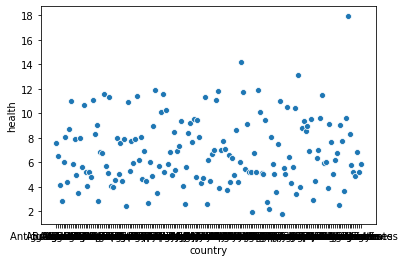

In [17]:
sns.scatterplot(df["country"], df["health"])

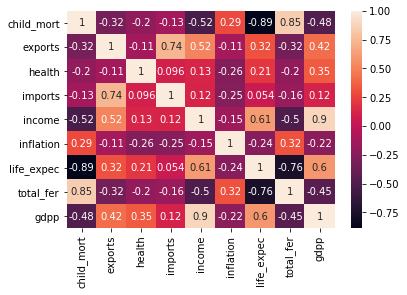

In [25]:
sns.heatmap(df.corr(), annot=True)

In [4]:
df.drop("country", axis=1, inplace=True)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Income is the label**

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
new_df = pd.DataFrame(X, columns= df.columns)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


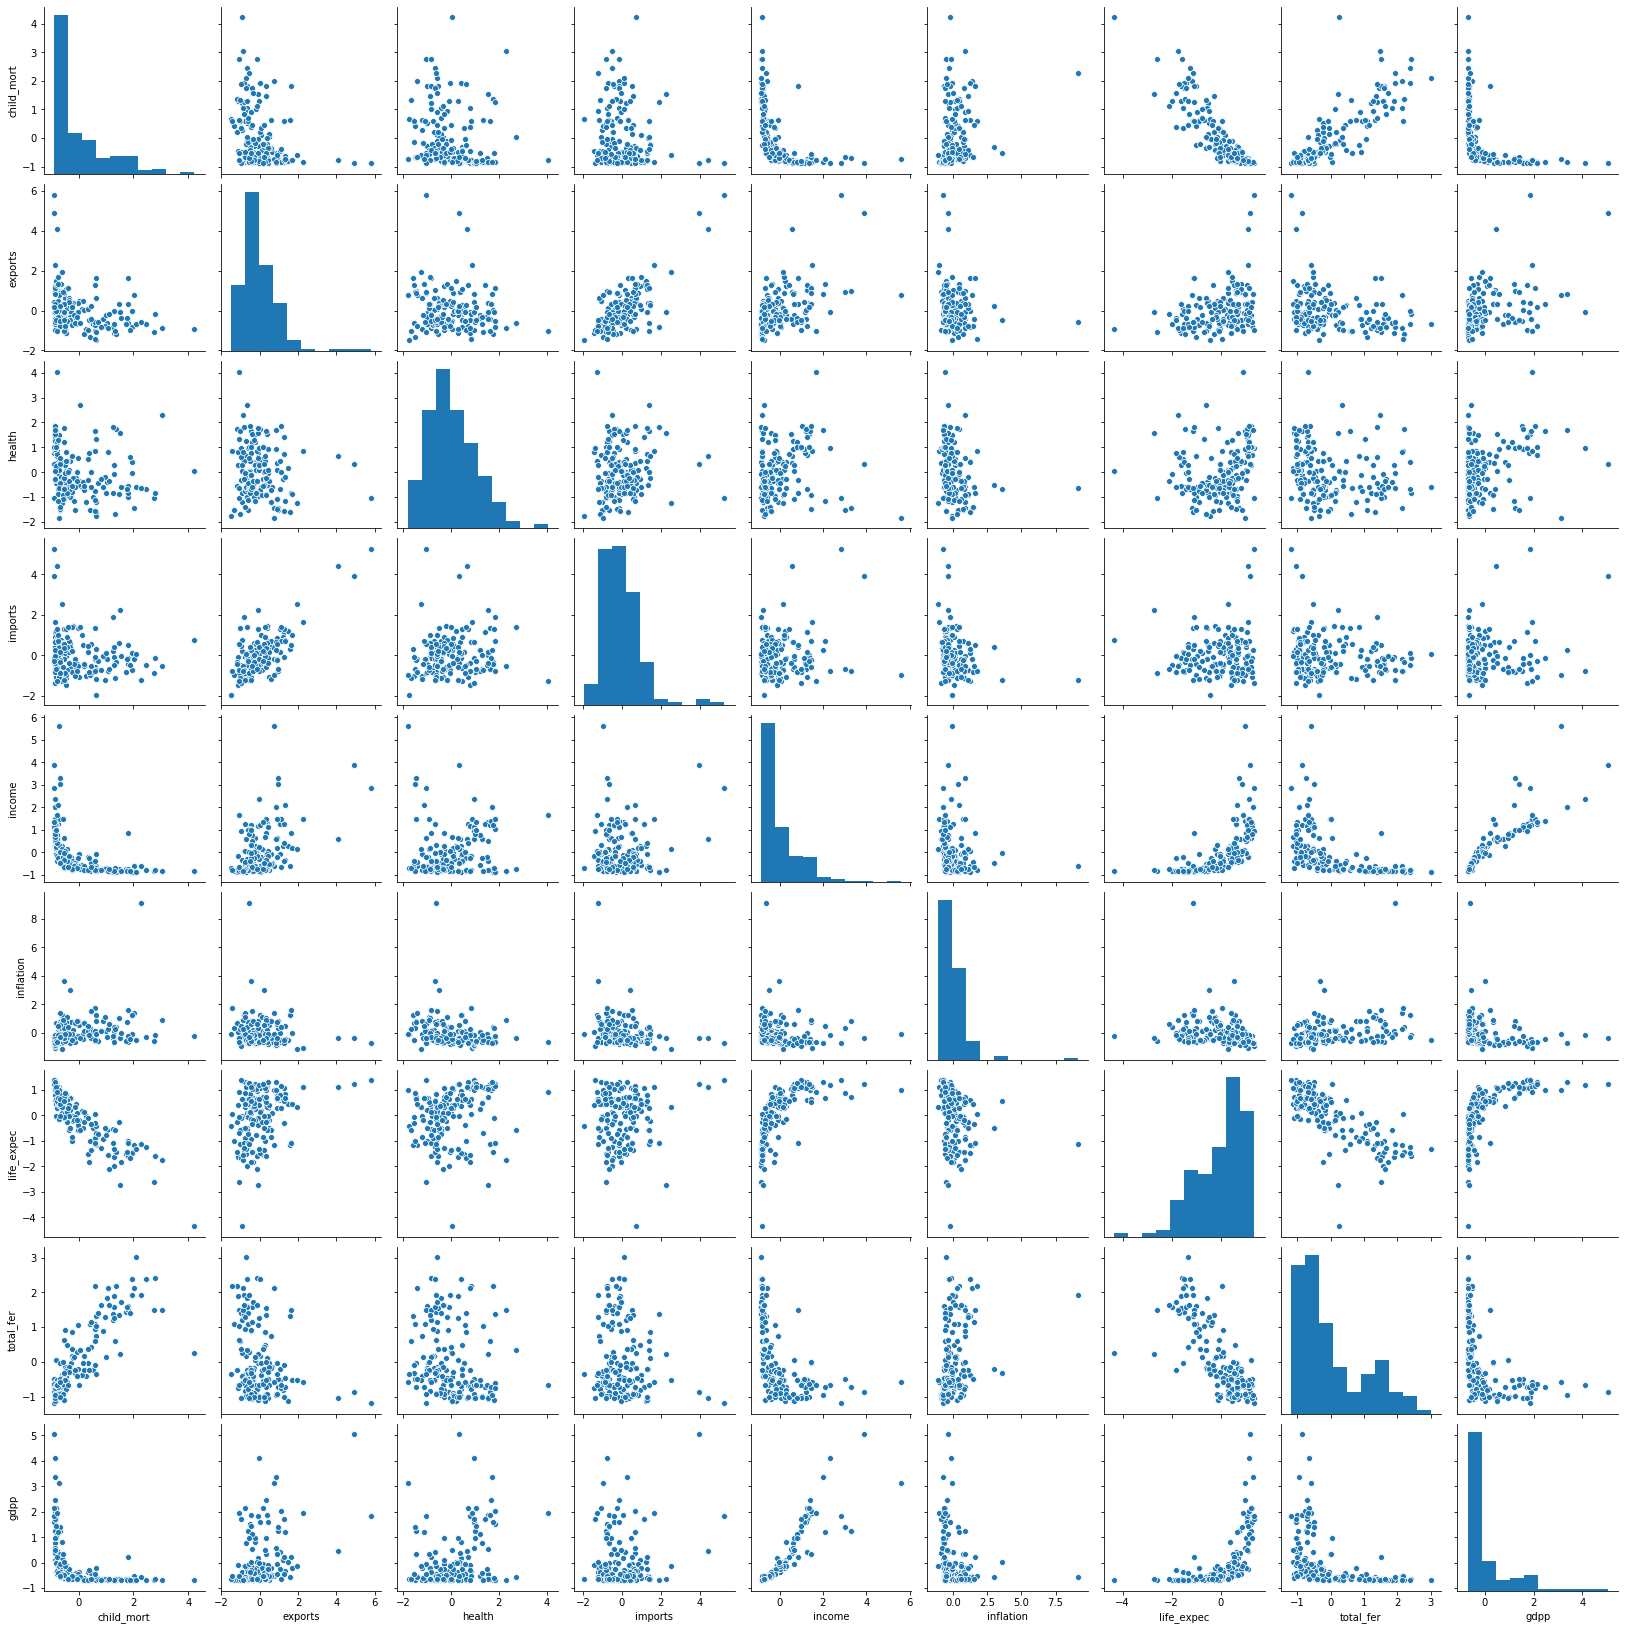

In [38]:
sns.pairplot(new_df)

# KMeans

In [6]:
from sklearn.cluster import KMeans

In [7]:
inertials = []

for i in range(1, 12):
    KM = KMeans(n_clusters = i)
    KM.fit(new_df)
    inertials.append(KM.inertia_)
    

Text(0.5, 1.0, 'Clusters vs inertias')

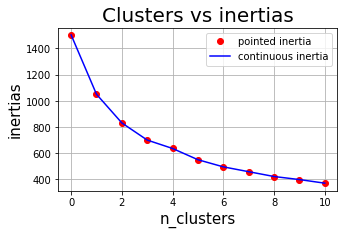

In [145]:
plt.figure(figsize=(5, 3))
plt.plot(inertials, "ro", label="pointed inertia")
plt.plot(inertials, "b-", label="continuous inertia")
plt.legend(loc="upper right")
plt.grid(True)
plt.xlabel("n_clusters", fontsize=15)
plt.ylabel("inertias", fontsize=15)
plt.title("Clusters vs inertias", fontsize=20)

In [136]:
KM = KMeans(2)
predictions = KM.fit_predict(new_df)
# pd.concat([new_df,])
new_df["Clusters"] = pd.DataFrame(predictions)

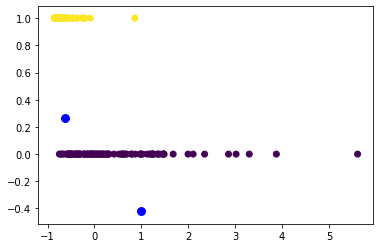

In [156]:
plt.scatter(new_df["income"], new_df["Clusters"], c = new_df["Clusters"])
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], s = len(X_train)/2, c="blue")

In [150]:
KM.cluster_centers_

array([[-0.63209199,  0.26728134,  0.19564075,  0.1307886 ,  0.4279143 ,
        -0.21336784,  0.63647746, -0.64509708,  0.38345279,  1.40196078],
       [ 0.9918982 , -0.4194261 , -0.30700548, -0.20523749, -0.67149629,
         0.33482338, -0.99878001,  1.01230618, -0.60172591,  1.27692308]])

In [21]:
KM.cluster_centers_

array([[-0.53510335,  0.17028863,  0.05628542,  0.06278249,  0.27801195,
        -0.15804196,  0.51480026, -0.54628913,  0.24401885,  0.32773109],
       [ 1.32661038, -0.42217389, -0.13954094, -0.15564827, -0.68923797,
         0.39181237, -1.27627565,  1.3543418 , -0.60496339,  3.        ]])

# Agglomerative Clustering

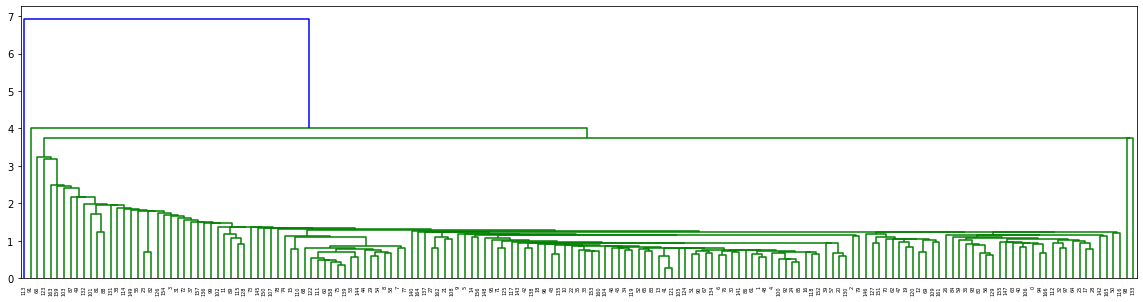

In [162]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 5))
sch2 = sch.dendrogram(sch.linkage(new_df))

In [29]:
# new_df.drop("Clusters", axis=1, inplace=True)
aggergation = AgglomerativeClustering(10)
new_df["Clusters"]=aggergation.fit_predict(new_df)

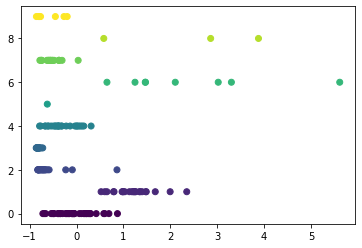

In [30]:
plt.scatter(new_df["income"], new_df["Clusters"], c = new_df["Clusters"])

# Machine Learning: Classification

**Spliting DataFrame**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop("Clusters", axis=1), new_df["Clusters"] , random_state=42)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# Metrics
from sklearn.metrics import f1_score, precision_score, recall_score

In [49]:
models = {"DT": DecisionTreeClassifier(),"RF": RandomForestClassifier(),"LR" :LogisticRegression()
, "SGDC":SGDClassifier(),"svc": SVC(random_state=42)}

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Training accuracy score: ", model.score(X_train, y_train))
    print("Testing accuracy score: ", model.score(X_test, y_test))
    print("f2_score: ",f1_score(y_test, predictions, average="macro"))
    print("Precision" ,precision_score(y_test, predictions, average="macro"))
    print("Recall: ",recall_score(y_test, predictions, average="macro"))
    print("///"*20)

DT
Training accuracy score:  1.0
Testing accuracy score:  0.7380952380952381
f2_score:  0.596978021978022
Precision 0.5601851851851851
Recall:  0.6777777777777777
////////////////////////////////////////////////////////////
RF
Training accuracy score: 

D:\Istalled-Program\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1.0
Testing accuracy score:  0.7857142857142857
f2_score:  0.7273368606701941
Precision 0.7464726631393298
Recall:  0.7582010582010583
////////////////////////////////////////////////////////////
LR
Training accuracy score:  0.944
Testing accuracy score:  0.7380952380952381
f2_score:  0.6208393056219143
Precision 0.6230078563411898
Recall:  0.6738095238095239
////////////////////////////////////////////////////////////
SGDC
Training accuracy score:  0.864
Testing accuracy score:  0.7619047619047619
f2_score:  0.7129068462401795
Precision 0.7015873015873015
Recall:  0.782010582010582
////////////////////////////////////////////////////////////
svc
Training accuracy score:  0.96
Testing accuracy score:  0.7619047619047619
f2_score:  0.6335978835978836
Precision 0.6291887125220459
Recall:  0.6896825396825397
////////////////////////////////////////////////////////////


D:\Istalled-Program\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Istalled-Program\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Istalled-Program\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Istalled-Program\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:

# SupportVectorMachine

In [124]:
svc = SVC(random_state=42)
model = svc.fit(X_train, y_train)

print("Voting train score: ", svc.score(X_train, y_train))
print("Voting test score: ", svc.score(X_test, y_test))

Voting train score:  0.96
Voting test score:  0.7619047619047619


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [114]:
estimators = [("RF",RandomForestClassifier()),("LR",  LogisticRegression()), ("DT",DecisionTreeClassifier()), ("SVC",SVC()), ("SGD",SGDClassifier())]

VC = VotingClassifier(estimators,voting="hard" )
votter = VC.fit(X_train, y_train)

votter.predict(X_test)
# precision 
precision_score(y_test, votter.predict(X_test),  average='micro')
# recall
recall_score(y_test, votter.predict(X_test),  average='micro')

0.8095238095238095

In [128]:
# number of estimators
len(votter.estimators_)

5

In [123]:
print("Voting train score: ", votter.score(X_train, y_train))
print("Voting test score: ", votter.score(X_test, y_test))

Voting train score:  0.968
Voting test score:  0.8095238095238095


# Pipeline (Data flow)

In [113]:
from sklearn.pipeline import Pipeline

# Data pipeline of SVC
KMEANS_PIPELINE = Pipeline([("SS",StandardScaler()),
                            ("KM", KMeans(2)),
                            ("SVC", SVC(random_state=42))])

KMEANS_PIPELINE.fit(X_train, y_train)

# Data pipeline of VotingClassifier
VOTING_CLASSIFIER  =  Pipeline([("SS",StandardScaler()),
                            ("KM", KMeans(2)),
                            ("Votter", votter)])



# Predictions SVC
KMEANS_PIPELINE.predict(X_test) # KMeans

array([2, 7, 4, 2, 6, 1, 4, 1, 0, 7, 7, 0, 1, 0, 0, 3, 2, 0, 0, 4, 4, 4,
       4, 4, 8, 1, 4, 0, 2, 2, 4, 4, 7, 0, 1, 4, 0, 2, 1, 1, 4, 3],
      dtype=int64)

In [120]:
import joblib 

joblib.dump(VOTING_CLASSIFIER, "Voter_Pipeline.h5")
joblib.dump(KMEANS_PIPELINE, "SVC_Pipeline.h5")
joblib.dump(KM, "KMeans.h5")
joblib.dump(aggergation, "Agglomerative.h5")
joblib.dump(model, "SVC.h5")
joblib.dump(scaler, "StandardScaler.h5")

['StandardScaler.h5']

**Pipeline load**

In [121]:
joblib.load("Voter_Pipeline.h5")

Pipeline(memory=None,
         steps=[('SS',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KM',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=2, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('Votter',
                 VotingClassifier(estimators=[('RF',
                                               RandomForestClassifier(bootstrap=True,
                                                                      c...
                                                             early_stopping=False,
                                                             epsilon=0.1,
                                                             eta0=0.0,
                                                             fit_intercept=True,
                                    